In [1]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import h5py
def keys(f):
    return [key for key in f.keys()]
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift ,ifft
import gwpy
from gwpy.timeseries import TimeSeries
from scipy.interpolate import CubicSpline as spline
from scipy.optimize import curve_fit , least_squares

#h5py.run_tests()
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c

In [2]:
def ml1(x,a,b,c):
    return a*(1+b*x)/(1+c*x)


In [3]:
lamda=np.load('results/lamda.npy')
q=np.load('results/q.npy')
rhM=np.load('results/rhM.npy')
dtM=np.load('results/dtM.npy')
freq=np.load('results/freq.npy')
zeta=np.load('results/zeta.npy')
mas=np.load('results/mas.npy')

## Analysis for the $\frac{Δt_{min}}{M}\sim \bar{\Lambda}$

The time between merger and amplitude minimum in relation with the tidal deformablity

We use the model $$ \frac{Δt_{min}}{M}=a\frac{1+b\bar{\Lambda}}{1+c\bar{\Lambda}} $$


In [4]:
init_vals = [.0,.0,.0]
rh_vals , rh_covar = curve_fit(ml1,lamda,dtM,p0=init_vals)
print('a =',rh_vals[0])
print('b =',rh_vals[1])
print('c =',rh_vals[2])

a = 37.81681345539071
b = 0.0006513670715802176
c = 6.064064323935622e-05


In [5]:
y_x=ml1(lamda,rh_vals[0],rh_vals[1],rh_vals[2])
n=len(dtM)
rms = np.sqrt(np.sum((pow((np.array(y_x)-dtM),2)))/n) #_L for linear curve
print('rms =',rms)

rms = 13.551972471958123


In [6]:
x=np.linspace(400,2300,1000)
y=ml1(x,rh_vals[0],rh_vals[1],rh_vals[2])
y1=y+rms
y2=y-rms


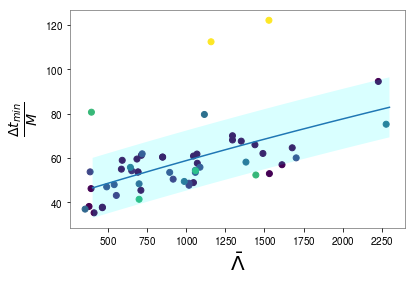

In [7]:
fig1=plt.figure()
plt.scatter(lamda,dtM,c=q)
plt.xlabel('lamda')
plt.ylabel('dtM')
plt.xlabel(r'$\bar{\Lambda}$',fontsize=20)
plt.ylabel(r'$\frac{Δt_{min}}{M}$',fontsize=20)
plt.grid(False)
#plt.title('',fontsize=20)
plt.plot(x,y)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x, y1, y2, facecolor="cyan", alpha=0.15)
plt.show()

## Analysis for the $\frac{rh_{22}(t_{max_1})}{M} \sim q$

The amplitude of the first postmerger maximun in relation with the mass ratio of the neutron stars

We use the model $$ \frac{rh_{22}(t_{max_1})}{M}=a\frac{1+bq}{1+cq} $$


In [8]:
init_vals = [.0,.0,.0]
rh_vals , rh_covar = curve_fit(ml1,q,rhM,p0=init_vals)
print('a =',rh_vals[0])
print('b =',rh_vals[1])
print('c =',rh_vals[2])

a = 0.279787458067659
b = -0.5384441533409962
c = -0.25231123926202403


In [9]:
y_x=ml1(q,rh_vals[0],rh_vals[1],rh_vals[2])
n=len(rhM)
rms = np.sqrt(np.sum((pow((np.array(y_x)-rhM),2)))/n) #_L for linear curve
print('rms =',rms)

rms = 0.01779235472506902


In [10]:
x=np.linspace(1,1.8,1000)
y=ml1(x,rh_vals[0],rh_vals[1],rh_vals[2])
y1=y+rms
y2=y-rms


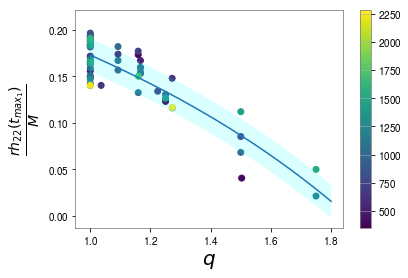

In [11]:
plt.scatter(q,rhM,c=lamda)
plt.colorbar()
plt.xlabel(r'$q$',fontsize=20)
plt.ylabel(r'$\frac{rh_{22}(t_{max_1})}{M}$',fontsize=20)
#plt.title("",fontsize=20)
plt.grid(False)
plt.plot(x,y)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x, y1, y2, facecolor="cyan", alpha=0.15)
plt.show()

## Analysis for the $Mf_2\sim \zeta$

We have the dominant emission mode of the merger remnant $Mf_2$ and the parameter $\zeta=k_{eff}+a\frac{M}{M_TOV}$ where a=-131.7010 and $k_{eff}=\frac{3}{16}\bar{\Lambda}$

We use the model $$ Mf_2(\zeta)=a\frac{1+b\zeta}{1+c\zeta} $$

In [12]:
init_vals = [.0,.0,.0]
rh_vals , rh_covar = curve_fit(ml1,zeta,mas*freq,p0=init_vals)
print('a =',rh_vals[0])
print('b =',rh_vals[1])
print('c =',rh_vals[2])

a = 0.03396085115759339
b = 0.0019268223729826531
c = 0.0038572621676412756


In [13]:
y_x=ml1(zeta,rh_vals[0],rh_vals[1],rh_vals[2])
n=len(zeta)
rms = np.sqrt(np.sum((pow((np.array(y_x)-mas*freq),2)))/n) #_L for linear curve
print('rms =',rms)

rms = 0.0012399837424637123


In [14]:
x=np.linspace(-150,350,1000)
y=ml1(x,rh_vals[0],rh_vals[1],rh_vals[2])
y1=y+rms
y2=y-rms


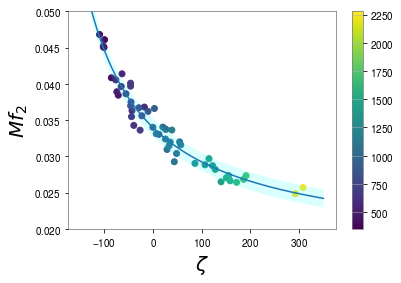

In [15]:
plt.scatter(zeta,mas*freq,c=lamda)
plt.colorbar()
plt.xlabel(r'$\zeta$',fontsize=20)
plt.ylabel(r'$Mf_2$',fontsize=20)
plt.ylim(0.02,0.05)
#plt.title("",fontsize=20)
plt.grid(False)
plt.plot(x,y)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x, y1, y2, facecolor="cyan", alpha=0.15)
plt.show()